In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from scipy.stats import probplot
from scipy.stats import kstest, chisquare # tests
from scipy.stats import gamma, beta, norm, lognorm # distributions
drive.mount('/content/drive')
from scipy import stats

Mounted at /content/drive


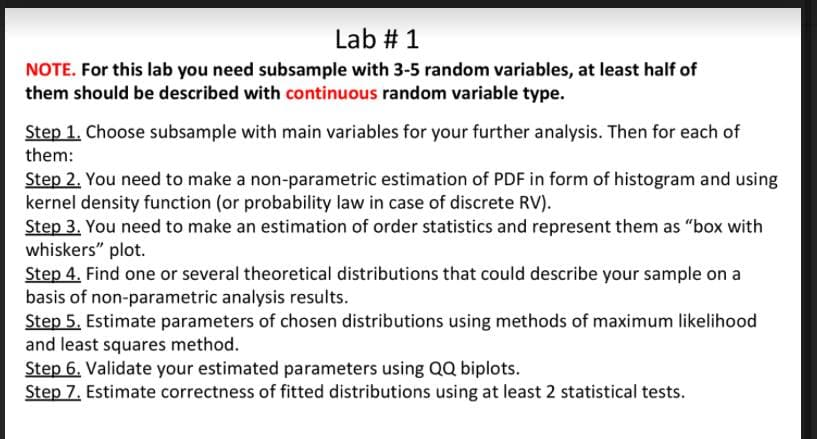

In [ ]:
%ls "/content/drive/MyDrive/MDALabs/lab1/data/train_timeseries/"

train_timeseries.csv


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MDALabs/lab1/data/train_timeseries/train_timeseries.csv").sample(1_000_000)
# data = pd.read_csv("/content/drive/MyDrive/train_timeseries-002.csv").sample(1000000)

# Новый раздел

In [ ]:
data.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
11508002,36119,2002-05-22,0.00,101.17,5.08,11.28,4.07,4.08,18.91,3.16,15.75,11.54,1.96,2.71,0.99,1.72,3.83,5.60,1.66,3.94,NaN
5987101,21011,2001-10-23,15.00,97.59,10.70,18.63,14.32,14.32,24.61,13.31,11.30,18.52,3.20,5.07,1.87,3.21,6.62,8.64,5.06,3.58,0.0
1982095,12059,2003-01-10,0.46,100.92,7.54,12.06,9.12,9.12,15.49,3.05,12.44,11.83,4.58,6.02,3.10,2.92,7.42,9.44,6.31,3.13,NaN
4157208,18013,2007-06-11,0.00,99.26,9.94,20.97,13.71,13.71,28.00,14.10,13.90,20.88,2.64,3.37,1.79,1.58,4.93,6.96,2.34,4.61,NaN
3190264,13315,2012-05-31,3.14,100.05,13.47,27.71,18.56,18.56,34.80,21.63,13.17,28.72,2.74,4.80,1.58,3.22,4.36,6.63,1.68,4.95,NaN


In [ ]:
len(data)

1000000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


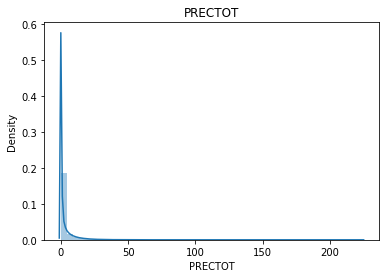

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


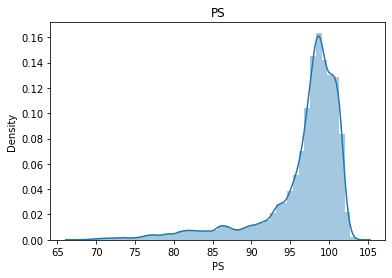

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


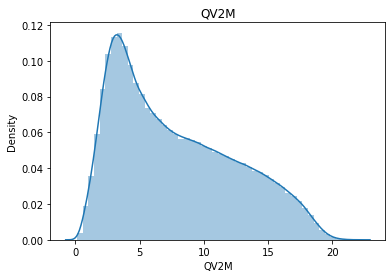

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


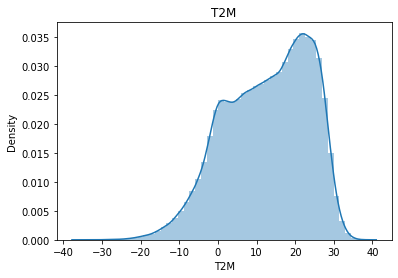

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


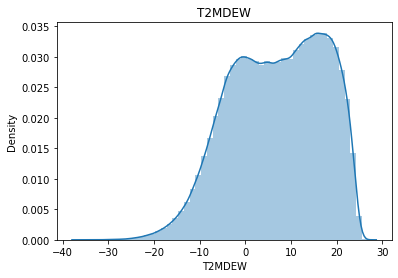

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


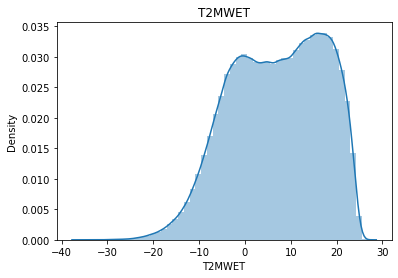

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


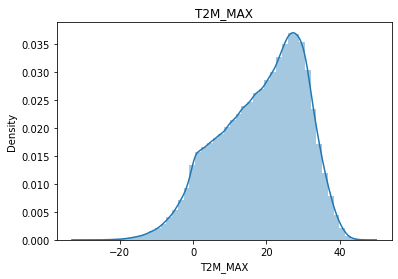

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


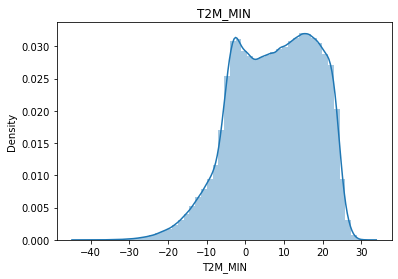

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


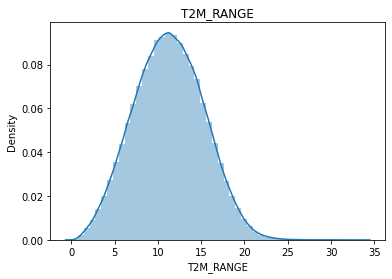

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


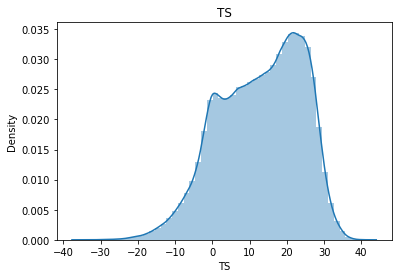

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


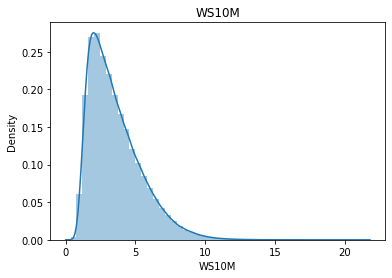

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


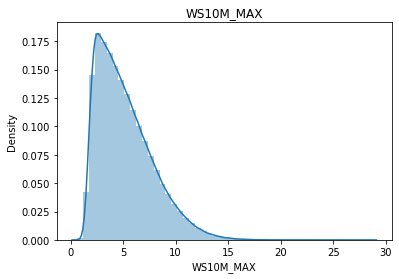

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


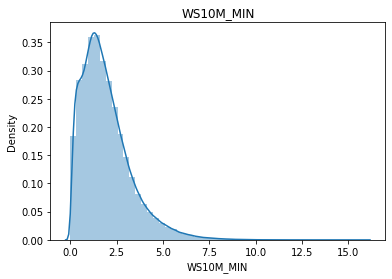

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


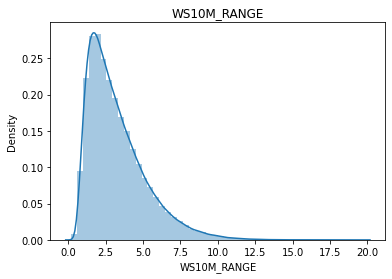

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


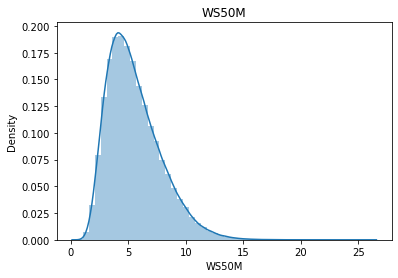

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


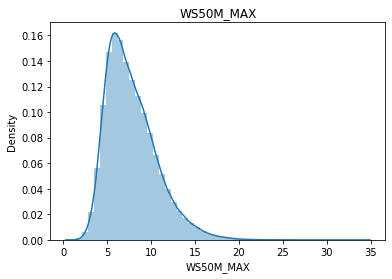

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


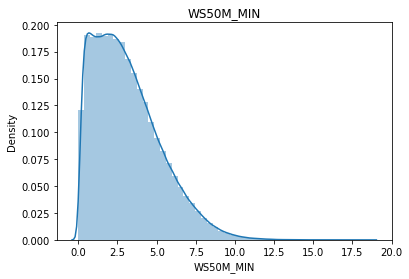

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


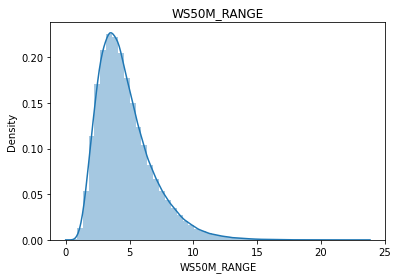

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


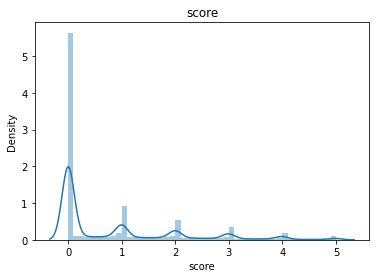

In [ ]:
for col in data.columns[2:]:
    sns.distplot(data[col])
    plt.title(col)
    plt.show()

In [ ]:
chosen_columns = ['PRECTOT', 'T2MDEW', 'T2M_RANGE', 'WS10M']

In [ ]:
from scipy import optimize
def delete_extreme_p(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    under_border, top_border = q1 - 1.5*iqr, q3 + 1.5*iqr
    data = data[data > under_border]
    data = data[data < top_border]
    return data

In [ ]:
def optim_distr(data, distr):
    def least_squares(x, y, pdf):
        return np.sum((pdf(x) - y)**2)
    
    data = delete_extreme_p(data)
    
    bins = 50
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_edges += (bin_edges[0] - bin_edges[1]) / 2
    bin_edges = bin_edges[1:]
    
    if distr == gamma:
        ab_init = (1, 1, 1)
    elif distr == lognorm:
        hist = hist[bin_edges > 0]
        bin_edges = bin_edges[bin_edges > 0]
        ab_init = (1, 1, 1)
    else:
        ab_init = (1, 1)
    optfun = lambda abc: least_squares(bin_edges, hist, distr(*abc).pdf)

    opt = optimize.minimize(optfun, ab_init, method="nelder-mead", 
                            options={'disp': True, 'maxiter': 2000})
    
    x = np.linspace(data.min(), data.max(), bins)
    #print(opt.x)
    
    #plt.figure(figsize=(10, 10))
    #plt.title(distr, fontsize=20)
    #plt.hist(data, bins, density=True, color='b', edgecolor='white', alpha=0.5)
    
    #plt.plot(x, distr(*opt.x).pdf(x), 'r', lw=1, alpha=1)
    #print("KStest - ", stats.kstest(data, distr(*opt.x).pdf(x)))
    #plt.show()
    # qq_plot(data, distr, sparams=opt.x, )
    
    return list(opt.x)

# data = df['T2M_RANGE'].to_numpy()
# optim_distr(data, stats.gamma)

In [ ]:
def plot_hist(y, pdf):
    plt.figure(figsize=(10,10))

    x = np.linspace(y.min(), y.max(), 50)

    weights = np.ones_like(y)/float(len(y))

    plt.hist(y, bins=30, density=True, histtype ='bar', color='b', edgecolor='white', alpha=0.6)
    plt.plot(x, pdf(x), color='r', lw=4)
    plt.show()
    
def qq_plot(y, distr, sparams):
    pylab.figure(figsize=(10,10))
    stats.probplot(y, dist=distr, plot=pylab, sparams=sparams)
    pylab.show()
    
def get_distribution_ML(y, distr):
    y = delete_extreme_p(y)
    N = len(y)
    mean = np.sum(y) / N
    std = np.sqrt(np.sum((y - mean)**2) / N)

    if distr == "norm":
        mu = mean
        sigma = std
        #plot_hist(y, stats.norm(mu, sigma).pdf)
        #qq_plot(y, stats.norm, (mu, sigma))
        return mu, sigma
    
    if distr == "lognorm":
        y = y[y > 0]
        mu = np.log( mean**2 / (np.sqrt(mean**2 + std**2)) )
        sigma = np.sqrt(np.log(1 + std**2 / mean**2))
        #plot_hist(y, stats.lognorm(s=sigma, scale=np.exp(mu)).pdf)
        #qq_plot(y, stats.lognorm, (sigma, mu))
        return mu, sigma
    
    if distr == "gamma":
        y = y[y > 0]
        log_mean = np.log(y.mean())
        mean_log = np.log(y).mean()
        s = log_mean - mean_log
        k = 3 - s + np.sqrt((s - 3)**2 + 24 * s) / 12 / s
        teta = y.mean() / k
        #plot_hist(y, stats.gamma(a=k, scale=teta).pdf)
        #qq_plot(y, stats.gamma, (k, teta))
        return k, teta
    
    if distr == "beta":
        a = mean * ((mean * (1 - mean)) / std**2 - 1)
        b = (1 - mean) * (mean * (1 - mean) / std**2 - 1)
        #plot_hist(y, stats.beta(a, b).pdf)
        #qq_plot(y, stats.beta, (a, b))
        return a, b
    
get_distribution_ML(delete_extreme_p(data['PRECTOT']).to_numpy(), 'beta')

(-0.013812724132519546, -0.037186034710333216)

In [ ]:
delete_extreme_p(data['PRECTOT']).to_numpy()

array([0.  , 0.19, 0.16, ..., 0.  , 2.02, 0.  ])

In [ ]:
parameters_LS = {key:{} for key in chosen_columns}

chosen_distributions = {'norm': norm, 
                        'lognorm': lognorm, 
                        'gamma': gamma, 
                        'beta': beta}

for col in tqdm(chosen_columns):
    print('-----------  ', col, '-----------')
    parameters_LS[col] = {key:{} for key in chosen_distributions}
    for dist in chosen_distributions:
        y = data[col].to_numpy()
        opt = optim_distr(y, chosen_distributions[dist])
        parameters_LS[col][dist] = opt

  0%|          | 0/4 [00:00<?, ?it/s]

-----------   PRECTOT -----------
Optimization terminated successfully.
         Current function value: 0.537604
         Iterations: 45
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.000569
         Iterations: 489
         Function evaluations: 861
Optimization terminated successfully.
         Current function value: 0.000722
         Iterations: 306
         Function evaluations: 540
Optimization terminated successfully.
         Current function value: 0.458015
         Iterations: 58
         Function evaluations: 110
-----------   T2MDEW -----------
Optimization terminated successfully.
         Current function value: 0.001174
         Iterations: 85
         Function evaluations: 166
Optimization terminated successfully.
         Current function value: 0.025578
         Iterations: 46
         Function evaluations: 85
-----------   T2M_RANGE -----------
Optimization terminated successfully.
         Current function

In [ ]:
parameters_LS = {'PRECTOT': {'beta': [0.5637421312099691, 12.206755635597045],
  'gamma': [0.9001402600482455, 0.05389999997122874, 2.317439537590622],
  'lognorm': [2.9040409072143323, 0.02620940533491877, 0.022948832852127104],
  'norm': [0.016918149499874344, 0.07006859173924922]},
 'T2MDEW': {'beta': [1.6226994470089335, 0.030758475344946475],
  'gamma': [0.07830811804819221, 0.40780104111719384, 1.7708014775091594],
  'lognorm': [2.5215596390685073, 0.4078011867421177, 0.030305230877783917],
  'norm': [8.284613339026278, 11.809327202515721]},
 'T2M_RANGE': {'beta': [2.3682972818329837, 0.00038053173582434696],
  'gamma': [0.0068528634972802194, 0.716426588090602, 2.3366114388948334],
  'lognorm': [7.011382123650852, 1.211717669971204, 4.917863769921563e-05],
  'norm': [11.224126370195242, 4.187016284192087]},
 'WS10M': {'beta': [0.0025047547459192817, 0.0039304756900820255],
  'gamma': [1.8799118648867053, 0.9124603808896647, 1.431332707619562],
  'lognorm': [0.6533936743918839, 0.410140640072043, 2.7227891964194844],
  'norm': [2.8970639269852647, 1.5838617183433013]}}


parameters_ML = {'PRECTOT': {'beta': (-0.007936450369048725, -0.02187316925079757),
  'gamma': (2.4406727313715524, 0.17064600362239393),
  'lognorm': (-1.9961949667712338, 1.1600258081783479),
  'norm': (0.26623789468836057, 0.44872895358254616)},
 'T2MDEW': {'beta': (-9.78405120680777, 8.378708333185381),
  'gamma': (3.769589274930402, 3.1642965319471994),
  'lognorm': (1.3727286399785057, 1.0655924933513368),
  'norm': (6.962038510636596, 10.119389864824049)},
 'T2M_RANGE': {'beta': (-93.56688905150094, 85.24645782123388),
  'gamma': (6.428937737020492, 1.7491906005874704),
  'lognorm': (2.3613125958011745, 0.3424905592789226),
  'norm': (11.245437461358328, 3.9672091608742672)},
 'WS10M': {'beta': (-14.104981951203793, 9.961958159323999),
  'gamma': (5.290975124460434, 0.6434567895370579),
  'lognorm': (1.1237496726816565, 0.45022768999804164),
  'norm': (3.4045138671057464, 1.61386559223091)}}

{'PRECTOT': {'beta': [0.5637421312099691, 12.206755635597045],
  'gamma': [0.9001402600482455, 0.05389999997122874, 2.317439537590622],
  'lognorm': [2.9040409072143323, 0.02620940533491877, 0.022948832852127104],
  'norm': [0.016918149499874344, 0.07006859173924922]},
 'T2MDEW': {'beta': [1.6226994470089335, 0.030758475344946475],
  'gamma': [0.07830811804819221, 0.40780104111719384, 1.7708014775091594],
  'lognorm': [2.5215596390685073, 0.4078011867421177, 0.030305230877783917],
  'norm': [8.284613339026278, 11.809327202515721]},
 'T2M_RANGE': {'beta': [2.3682972818329837, 0.00038053173582434696],
  'gamma': [0.0068528634972802194, 0.716426588090602, 2.3366114388948334],
  'lognorm': [7.011382123650852, 1.211717669971204, 4.917863769921563e-05],
  'norm': [11.224126370195242, 4.187016284192087]},
 'WS10M': {'beta': [0.0025047547459192817, 0.0039304756900820255],
  'gamma': [1.8799118648867053, 0.9124603808896647, 1.431332707619562],
  'lognorm': [0.6533936743918839, 0.410140640072043

In [ ]:
for col in chosen_columns:
    clean_data = delete_extreme_p(data[col])
    print(np.percentile(clean_data, [0, 25, 50, 75, 100]))

[0.   0.   0.07 0.79 5.42]
[-25.65  -0.93   7.6   15.54  26.58]
[ 0.05  8.4  11.23 14.06 22.58]
[0.31 2.11 3.09 4.47 8.27]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


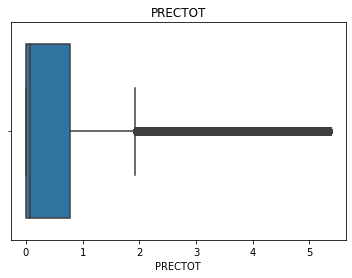

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


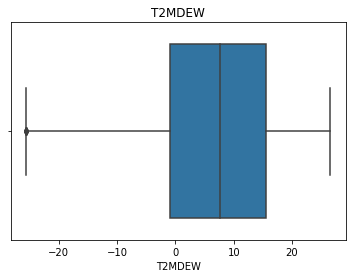

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


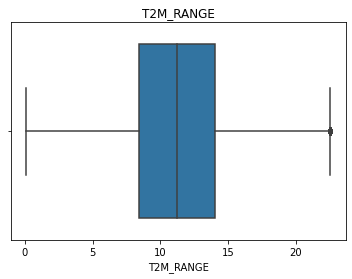

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


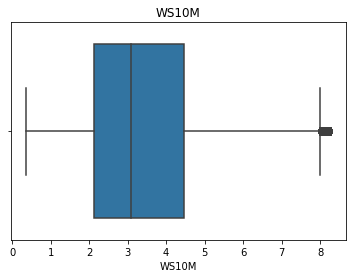

In [ ]:
for col in chosen_columns:
    clean_data = delete_extreme_p(data[col])
    sns.boxplot(clean_data)
    plt.title(col)
    plt.show()

In [ ]:
parameters_ML = {key:{} for key in chosen_columns}

chosen_distributions = {'norm': norm, 
                        'lognorm': lognorm, 
                        'gamma': gamma, 
                        'beta': beta}

for col in tqdm(chosen_columns):
    print(f'----------- {col} -----------')
    parameters_ML[col] = {key:{} for key in chosen_distributions}
    for dist in chosen_distributions:
        y = delete_extreme_p(data[col].to_numpy())
        parameters_ML[col][dist] = get_distribution_ML(y, dist)

  0%|          | 0/4 [00:00<?, ?it/s]

-----------   PRECTOT -----------
-----------   T2MDEW -----------
-----------   T2M_RANGE -----------
-----------   WS10M -----------


In [ ]:
dof = 100

for col in parameters_LS:
  for dist in parameters_LS[col]:
    plt.figure(figsize=(10, 10))
    plt.title(col + '__' + dist)
    clean_data = delete_extreme_p(data[col]).to_numpy()

    pdf1 = chosen_distributions[dist](*parameters_ML[col][dist]).pdf
    pdf2 = chosen_distributions[dist](*parameters_LS[col][dist]).pdf

    x = np.linspace(clean_data.min(), clean_data.max(), dof)
    y_ls = pdf1(x)
    y_ml = pdf2(x)

    plt.hist(clean_data, bins=50 , density=True, edgecolor='w')
    plt.plot(x, y_ml, label=dist + '_ML')
    plt.plot(x, y_ls, label=dist + '_LS')
    plt.legend()
    plt.show()

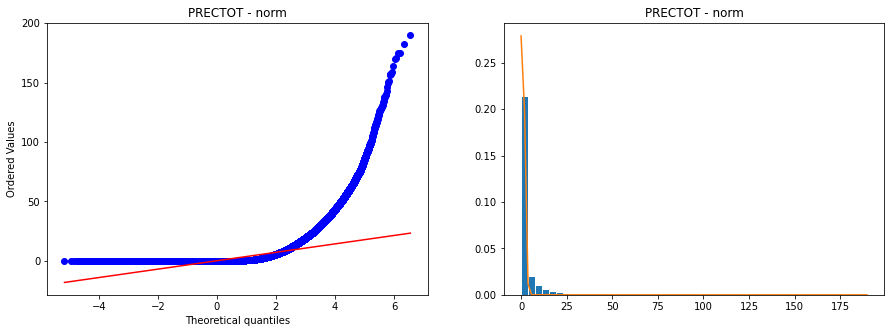

kstest : PRECTOT-norm: stat, pvalue = (0.28290756610053874, 0.0)
chisquare : PRECTOT-norm: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


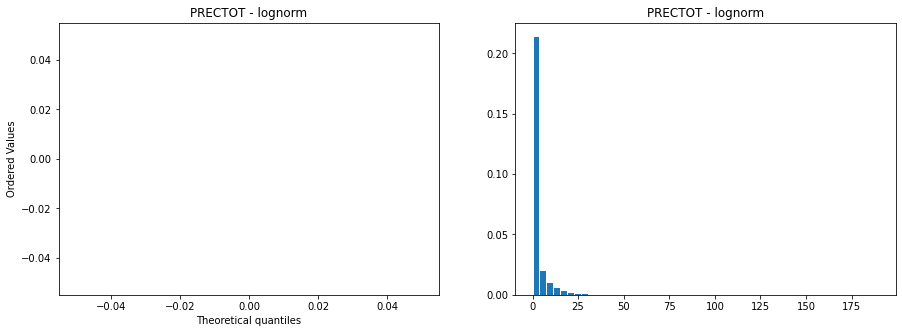

kstest : PRECTOT-lognorm: stat, pvalue = (nan, nan)
chisquare : PRECTOT-lognorm: stat, pvalue = (-1.862088351654162e-08, 1.0)


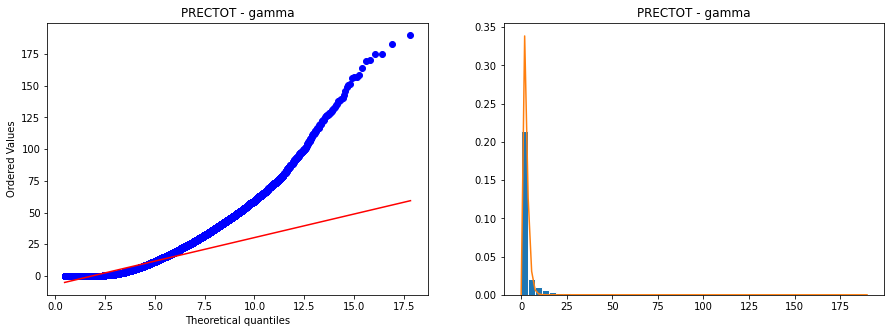

kstest : PRECTOT-gamma: stat, pvalue = (0.613318521364059, 0.0)
chisquare : PRECTOT-gamma: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


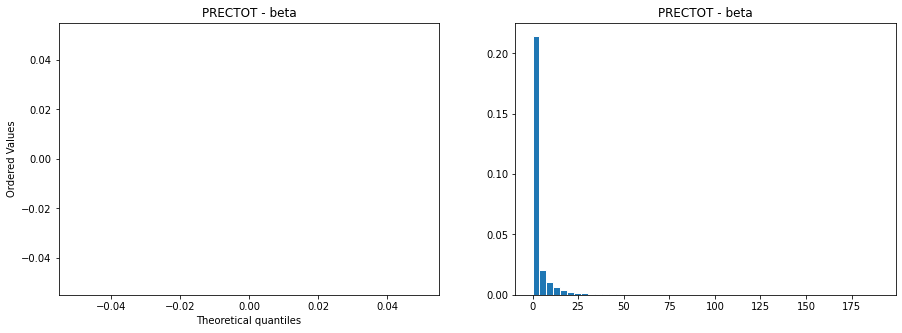

kstest : PRECTOT-beta: stat, pvalue = (nan, nan)
chisquare : PRECTOT-beta: stat, pvalue = (-1.862088351654162e-08, 1.0)


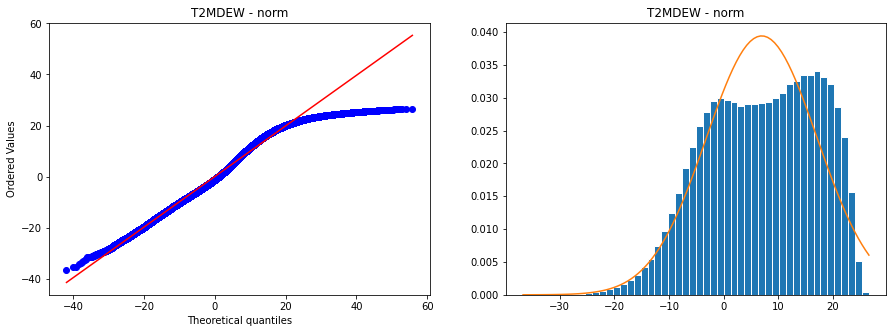

kstest : T2MDEW-norm: stat, pvalue = (0.05845863080129876, 0.0)
chisquare : T2MDEW-norm: stat, pvalue = (590920.6980693769, 0.0)


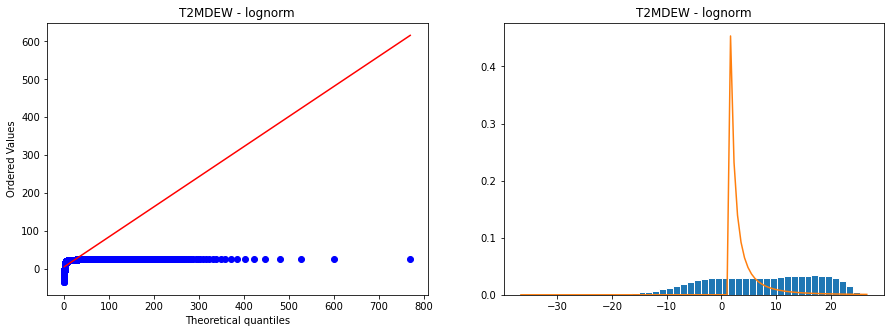

kstest : T2MDEW-lognorm: stat, pvalue = (0.42346424769560437, 0.0)
chisquare : T2MDEW-lognorm: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


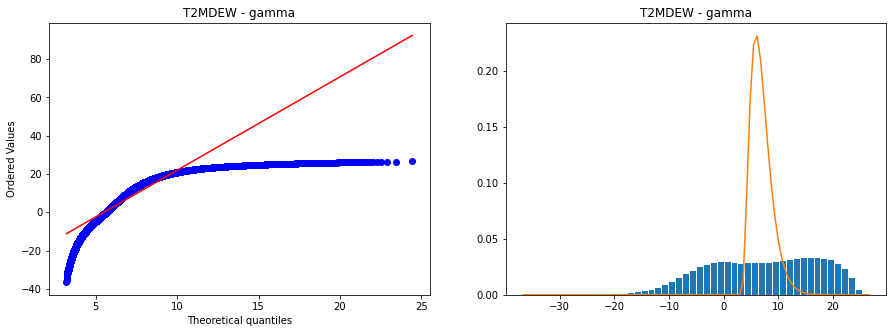

kstest : T2MDEW-gamma: stat, pvalue = (0.3835919275321212, 0.0)
chisquare : T2MDEW-gamma: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


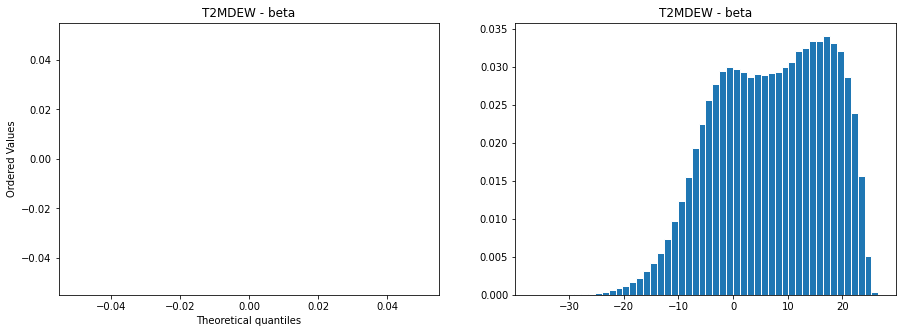

kstest : T2MDEW-beta: stat, pvalue = (nan, nan)
chisquare : T2MDEW-beta: stat, pvalue = (-1.5646286642603119e-09, 1.0)


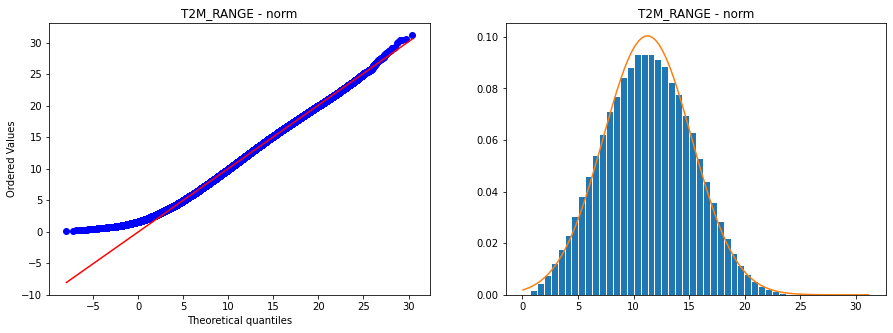

kstest : T2M_RANGE-norm: stat, pvalue = (0.01308992015841548, 2.9633089405513125e-149)
chisquare : T2M_RANGE-norm: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


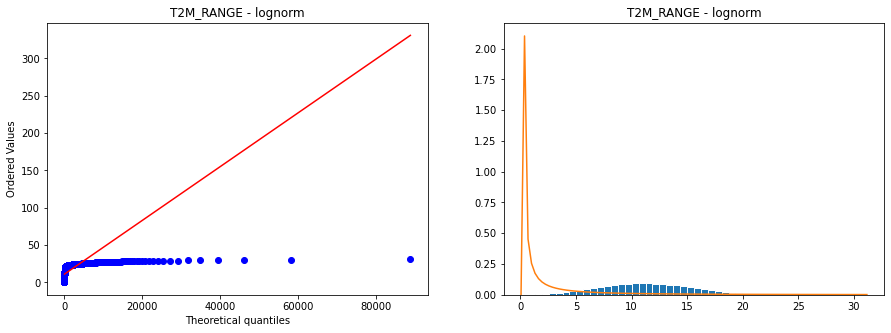

kstest : T2M_RANGE-lognorm: stat, pvalue = (0.6836019039060578, 0.0)
chisquare : T2M_RANGE-lognorm: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


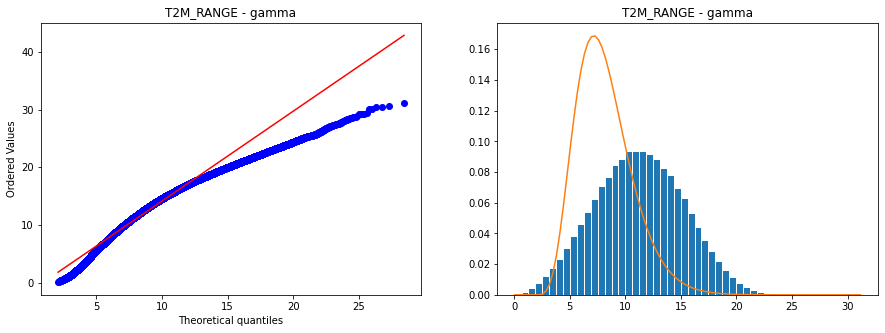

kstest : T2M_RANGE-gamma: stat, pvalue = (0.4024350689987694, 0.0)
chisquare : T2M_RANGE-gamma: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


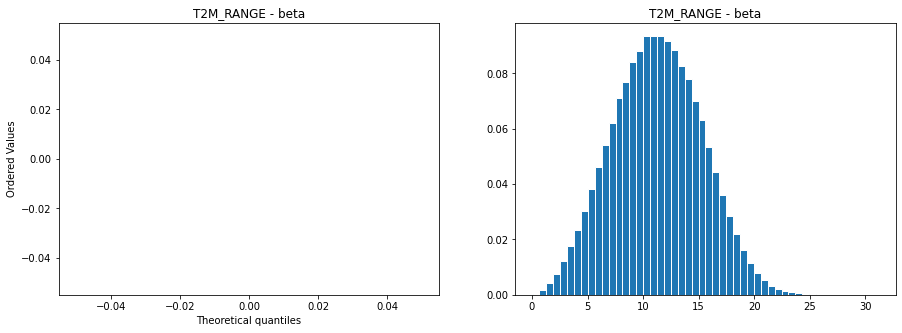

kstest : T2M_RANGE-beta: stat, pvalue = (nan, nan)
chisquare : T2M_RANGE-beta: stat, pvalue = (-1.6796055841723084e-09, 1.0)


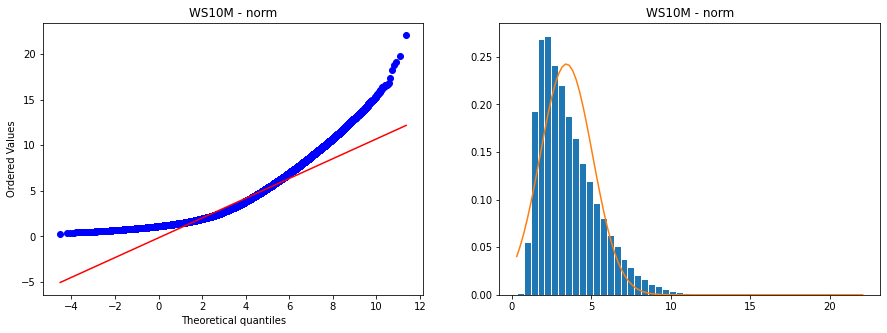

kstest : WS10M-norm: stat, pvalue = (0.07256795173916547, 0.0)
chisquare : WS10M-norm: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


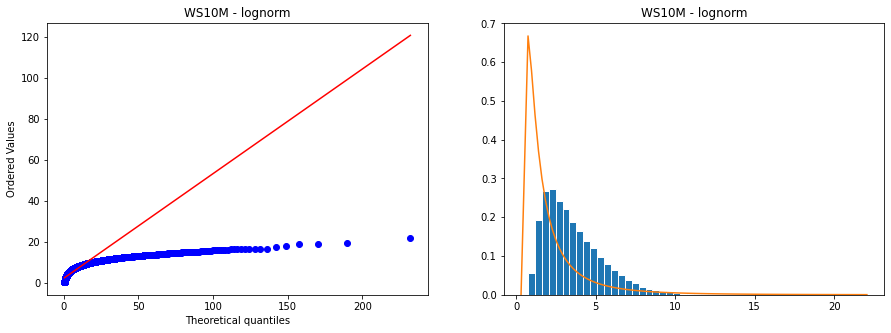

kstest : WS10M-lognorm: stat, pvalue = (0.4477427351455231, 0.0)
chisquare : WS10M-lognorm: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


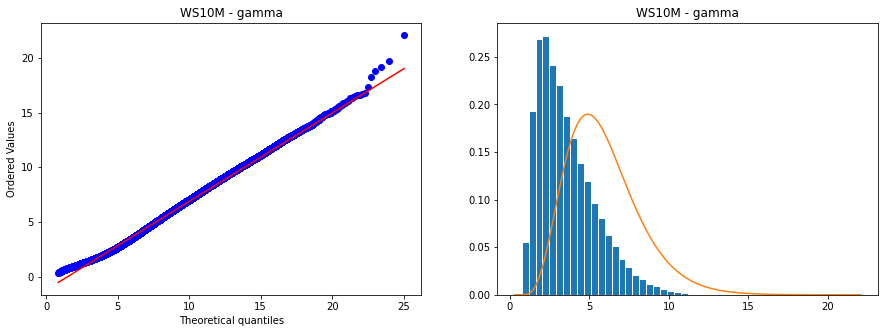

kstest : WS10M-gamma: stat, pvalue = (0.4546169358308288, 0.0)
chisquare : WS10M-gamma: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


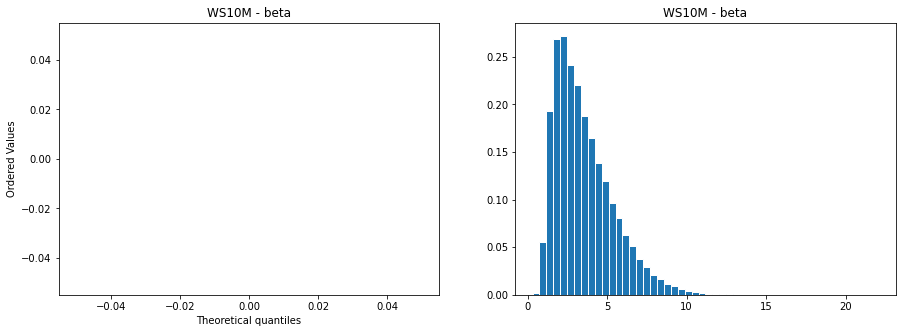

kstest : WS10M-beta: stat, pvalue = (nan, nan)
chisquare : WS10M-beta: stat, pvalue = (-1.56680130414949e-09, 1.0)


In [ ]:
dof = 100


for col in chosen_columns:
    for dist in chosen_distributions:
        clean_data = (data[col])
        data_dist, _ = np.histogram(delete_extreme_p(clean_data), bins=100)

        params = get_distribution_ML(clean_data.to_numpy(), dist)


        plt.figure(figsize=(15, 5))

        ax = plt.subplot(121)
        probplot(clean_data, sparams=tuple(params), dist=dist, plot=ax)
        ax.set_title('{} - {}'.format(col, dist))

        plt.subplot(122)

        pdf = chosen_distributions[dist](*params).pdf
        cdf = chosen_distributions[dist](*params).cdf
        stat, pvalue = kstest(clean_data, cdf)

        x = np.linspace(clean_data.min(), clean_data.max(), dof)
        y = pdf(x)

        plt.title('{} - {}'.format(col, dist))
        plt.hist(clean_data, bins=50 , density=True, edgecolor='w')
        plt.plot(x, y)

        plt.show()

        print('kstest : {}-{}: stat, pvalue = ({}, {})'.format(col, dist, stat, pvalue))

        cdf = cdf(x)
        exp_entries = (pdf(x) * len(clean_data)).astype(np.int)
        stat, pvalue = chisquare(data_dist, exp_entries)
        print('chisquare : {}-{}: stat, pvalue = ({}, {})'.format(col, dist, stat, pvalue))


In [ ]:
# -------------    MAXIMUM LIKELIHOOD    ----------------------

dof = 100

for col in chosen_columns:
    for dist in chosen_distributions:
        clean_data = delete_extreme_p(data[col])
        data_dist, _ = np.histogram(clean_data, bins=100)

        plt.figure(figsize=(15, 5))

        ax = plt.subplot(121)
        probplot(data.sample(10000)[col], sparams=tuple(parameters[col][dist]), dist=dist, plot=ax)
        ax.set_title('{} - {}'.format(col, dist))

        plt.subplot(122)
        
        pdf = chosen_distributions[dist](*parameters[col][dist]).pdf
        cdf = chosen_distributions[dist](*parameters[col][dist]).cdf
        stat, pvalue = kstest(clean_data, cdf)

        x = np.linspace(clean_data.min(), clean_data.max(), dof)
        y = pdf(x)

        plt.title('{} - {}'.format(col, dist))
        plt.hist(clean_data, bins=50 , density=True, edgecolor='w')
        plt.plot(x, y)

        plt.show()


        print('kstest : {}-{}: stat, pvalue = ({}, {})'.format(col, dist, stat, pvalue))

        cdf = cdf(x)
        exp_entries = (pdf(x) * len(clean_data)).astype(np.int)
        stat, pvalue = chisquare(data_dist, exp_entries)
        print('chisquare : {}-{}: stat, pvalue = ({}, {})'.format(col, dist, stat, pvalue))


In [ ]:
data_dist, _ = np.histogram(clean_data, bins=50)
print(data_dist.shape, (pdf(x) * len(clean_data)).astype(np.int).shape)

(50,) (100,)


In [ ]:
data_dist.shape

(50,)

In [ ]:
for col in chosen_columns:
    for dist in chosen_distributions:
        _, ax = plt.subplots(1, 1)
        probplot(delete_extreme_p(data.sample(10000)[col]), sparams=tuple(parameters[col][dist]), dist=dist, plot=ax)
        ax.set_title(f'{col} {dist}')
        plt.plot()


# Тесты 
(пункт 7)

In [ ]:
kstest_res_ML = {key:{} for key in chosen_columns}
chisquare_res_ML = {key:{} for key in chosen_columns}
kstest_res_LS = {key:{} for key in chosen_columns}
chisquare_res_LS = {key:{} for key in chosen_columns}

for name, parameters, kstest_res, chisquare_res in zip(['MLE', 'Least Squares'], 
                                                       [parameters_ML, parameters_LS],
                                                       [kstest_res_ML, kstest_res_LS],
                                                       [chisquare_res_ML, chisquare_res_LS]):
    
    print(name)
    dof = int(np.ceil(2*len(data)**(1.0/3.0)))
    print(dof)

    chosen_distributions = {'norm': norm, 
                            'lognorm':lognorm, 
                            'gamma': gamma, 
                            'beta': beta}

    for col in tqdm(chosen_columns, leave=False):
        data_col = delete_extreme_p(data[col])
        data_dist, _ = np.histogram(data_col, bins=dof)

        # generate four pdfs with the parameters obtained in the step 5
        x = np.linspace(data_col.min(), data_col.max(), dof)

        for dist_name in  tqdm(chosen_distributions, leave=False):
            rv = chosen_distributions[dist_name](*parameters[col][dist_name])
            cdf = rv.cdf(x)
            # print(pdf.shape, data_dist.shape)
            stat, pvalue = kstest(data_col, rv.cdf)
            kstest_res[col][dist_name] = {'stat':stat, 'pvalue':pvalue}

            exp_entries = np.round(len(data_col) * (cdf[1:] - cdf[:-1]))
            exp_entries = np.append(exp_entries, 0)
            mask = exp_entries > 4
            stat, pvalue = chisquare(data_dist[mask], exp_entries[mask])

            chisquare_res[col][dist_name] = {'stat':stat, 'pvalue':pvalue}

            # print(col, dist_name)
    

MLE
200


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Least Squares
200


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
kstest_res_ML, chisquare_res_ML

({'PRECTOT': {'beta': {'pvalue': nan, 'stat': nan},
   'gamma': {'pvalue': 0.0, 'stat': 0.6898910900894062},
   'lognorm': {'pvalue': nan, 'stat': nan},
   'norm': {'pvalue': 0.0, 'stat': 0.276349041071674}},
  'T2MDEW': {'beta': {'pvalue': nan, 'stat': nan},
   'gamma': {'pvalue': 0.0, 'stat': 0.3833425614547616},
   'lognorm': {'pvalue': 0.0, 'stat': 0.423683948304798},
   'norm': {'pvalue': 0.0, 'stat': 0.058591543202575425}},
  'T2M_RANGE': {'beta': {'pvalue': nan, 'stat': nan},
   'gamma': {'pvalue': 0.0, 'stat': 0.40160221263935947},
   'lognorm': {'pvalue': 0.0, 'stat': 0.6835081390872292},
   'norm': {'pvalue': 1.015927281686926e-147, 'stat': 0.013034913889087368}},
  'WS10M': {'beta': {'pvalue': nan, 'stat': nan},
   'gamma': {'pvalue': 0.0, 'stat': 0.4730720737033244},
   'lognorm': {'pvalue': 0.0, 'stat': 0.44633891539478954},
   'norm': {'pvalue': 0.0, 'stat': 0.07923638464822502}}},
 {'PRECTOT': {'beta': {'pvalue': nan, 'stat': 0.0},
   'gamma': {'pvalue': 0.0, 'stat': 949

In [ ]:
kstest_res_LS, chisquare_res_LS

({'PRECTOT': {'beta': {'pvalue': 0.0, 'stat': 0.38106351350077583},
   'gamma': {'pvalue': 0.0, 'stat': 0.4581337781843621},
   'lognorm': {'pvalue': 0.0, 'stat': 0.4751572849425258},
   'norm': {'pvalue': 0.0, 'stat': 0.407808218707127}},
  'T2MDEW': {'beta': {'pvalue': 0.0, 'stat': 0.6924726651265811},
   'gamma': {'pvalue': 0.0, 'stat': 0.09376150817940987},
   'lognorm': {'pvalue': 0.0, 'stat': 0.11720383511677612},
   'norm': {'pvalue': 0.0, 'stat': 0.0893439080556232}},
  'T2M_RANGE': {'beta': {'pvalue': 0.0, 'stat': 0.9994769832554485},
   'gamma': {'pvalue': 3.590951278134855e-113, 'stat': 0.011404220803057252},
   'lognorm': {'pvalue': 0.0, 'stat': 0.09902161056718728},
   'norm': {'pvalue': 2.835132597141905e-109, 'stat': 0.011205378459881284}},
  'WS10M': {'beta': {'pvalue': 0.0, 'stat': 0.9907862746982433},
   'gamma': {'pvalue': 0.0, 'stat': 0.040615940389875704},
   'lognorm': {'pvalue': 0.0, 'stat': 0.05520938232903694},
   'norm': {'pvalue': 0.0, 'stat': 0.1169131996809

In [ ]:
table = []
for res in [kstest_res_LS, chisquare_res_LS]:
    for feat in res:
        for dist in res[feat]:
            table.append([feat, dist, res[feat][dist]['pvalue'], res[feat][dist]['stat']])
print(pd.DataFrame(table))

            0        1              2             3
0     PRECTOT     norm   0.000000e+00  4.078082e-01
1     PRECTOT  lognorm   0.000000e+00  4.751573e-01
2     PRECTOT    gamma   0.000000e+00  4.581338e-01
3     PRECTOT     beta   0.000000e+00  3.810635e-01
4      T2MDEW     norm   0.000000e+00  8.934391e-02
5      T2MDEW  lognorm   0.000000e+00  1.172038e-01
6      T2MDEW    gamma   0.000000e+00  9.376151e-02
7      T2MDEW     beta   0.000000e+00  6.924727e-01
8   T2M_RANGE     norm  2.835133e-109  1.120538e-02
9   T2M_RANGE  lognorm   0.000000e+00  9.902161e-02
10  T2M_RANGE    gamma  3.590951e-113  1.140422e-02
11  T2M_RANGE     beta   0.000000e+00  9.994770e-01
12      WS10M     norm   0.000000e+00  1.169132e-01
13      WS10M  lognorm   0.000000e+00  5.520938e-02
14      WS10M    gamma   0.000000e+00  4.061594e-02
15      WS10M     beta   0.000000e+00  9.907863e-01
16    PRECTOT     norm   0.000000e+00  5.098390e+06
17    PRECTOT  lognorm   0.000000e+00  1.857765e+06
18    PRECTO

In [ ]:
table = []
for res in [kstest_res_ML, chisquare_res_ML]:
    for feat in res:
        for dist in res[feat]:
            table.append([feat, dist, res[feat][dist]['pvalue'], res[feat][dist]['stat']])
print(pd.DataFrame(table))

            0        1              2             3
0     PRECTOT     norm   0.000000e+00  2.763490e-01
1     PRECTOT  lognorm            NaN           NaN
2     PRECTOT    gamma   0.000000e+00  6.898911e-01
3     PRECTOT     beta            NaN           NaN
4      T2MDEW     norm   0.000000e+00  5.859154e-02
5      T2MDEW  lognorm   0.000000e+00  4.236839e-01
6      T2MDEW    gamma   0.000000e+00  3.833426e-01
7      T2MDEW     beta            NaN           NaN
8   T2M_RANGE     norm  1.015927e-147  1.303491e-02
9   T2M_RANGE  lognorm   0.000000e+00  6.835081e-01
10  T2M_RANGE    gamma   0.000000e+00  4.016022e-01
11  T2M_RANGE     beta            NaN           NaN
12      WS10M     norm   0.000000e+00  7.923638e-02
13      WS10M  lognorm   0.000000e+00  4.463389e-01
14      WS10M    gamma   0.000000e+00  4.730721e-01
15      WS10M     beta            NaN           NaN
16    PRECTOT     norm   0.000000e+00  9.151833e+06
17    PRECTOT  lognorm            NaN  0.000000e+00
18    PRECTO

# Всякий мусор
Ниже просто эксперименты

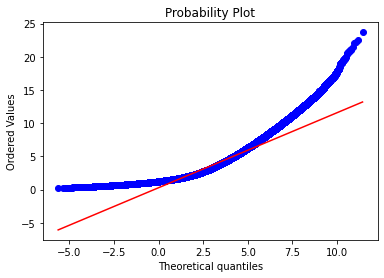

In [ ]:
fig, ax = plt.subplots(1, 1)
probplot(data['WS10M'], sparams=tuple(parameters['WS10M']['norm']), dist='norm', plot=ax)
plt.show()

In [ ]:
from scipy import stats

col = 'T2M_RANGE'
dof = 100

norm_rv = stats.norm(*parameters[col]['norm'])

x = np.linspace(data[col].min(), data[col].max(), dof)
y = norm_rv.pdf(x)

plt.hist(data[col], bins=dof , density=True)
plt.plot(x, y)

NameError: ignored

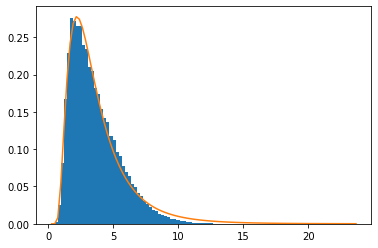

In [ ]:
from scipy.stats import lognorm

col = 'WS10M'
dof = 100

lognorm_rv = lognorm(*parameters[col]['lognorm'])

x = np.linspace(data[col].min(), data[col].max(), dof)
y = lognorm_rv.pdf(x)

plt.hist(data[col], bins=dof , density=True)
plt.plot(x, y)

In [ ]:
dist_name = 'norm'
col = 'T2M_RANGE'

data_dist, _ = np.histogram(data[col], bins=500)

x = np.linspace(data[col].min(), data[col].max(), 500)

rv = chosen_distributions[dist_name](*parameters[col][dist_name])
cdf = rv.cdf(x)
exp_entries = np.round(len(data[col]) * (cdf[1:] - cdf[:-1]))

mask = exp_entries > 4
stat, pvalue = chisquare(data_dist[:-1][mask], exp_entries[mask])
print(stat, pvalue)

151326.25223670408 0.0


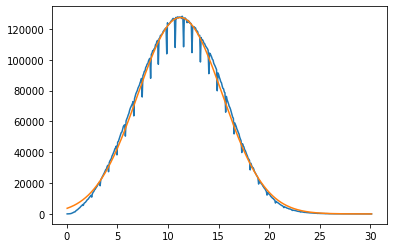

In [ ]:
plt.plot(x[:-1][mask], data_dist[:-1][mask])
plt.plot(x[:-1][mask], exp_entries[mask])

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
kstest_res, chisquare_res = ({'PRECTOT': {'beta': {'pvalue': 0.0, 'stat': 0.4663267726843885},
   'gamma': {'pvalue': 0.0, 'stat': 0.4307067641099891},
   'lognorm': {'pvalue': 0.0, 'stat': 0.3531909756547438},
   'norm': {'pvalue': 0.0, 'stat': 0.491455729042607}},
  'T2MDEW': {'beta': {'pvalue': 0.0, 'stat': 0.6914710777029618},
   'gamma': {'pvalue': 0.0, 'stat': 0.641440021825087},
   'lognorm': {'pvalue': 0.0, 'stat': 0.6039138693748549},
   'norm': {'pvalue': 0.0, 'stat': 0.08497879589872803}},
  'T2M_RANGE': {'beta': {'pvalue': 0.0, 'stat': 0.9995029190681365},
   'gamma': {'pvalue': 0.0, 'stat': 0.9926305548756955},
   'lognorm': {'pvalue': 0.0, 'stat': 0.9191192164950268},
   'norm': {'pvalue': 0.0, 'stat': 0.010870532511429557}},
  'WS10M': {'beta': {'pvalue': 0.0, 'stat': 0.9910395385033066},
   'gamma': {'pvalue': 0.0, 'stat': 0.008842646018025813},
   'lognorm': {'pvalue': 0.0, 'stat': 0.03213102653612965},
   'norm': {'pvalue': 0.0, 'stat': 0.11528363877594289}}},
 {'PRECTOT': {'beta': {'pvalue': 0.0, 'stat': 367559360.9219746},
   'gamma': {'pvalue': 0.0, 'stat': 129651962.80377044},
   'lognorm': {'pvalue': 0.0, 'stat': 17510616.28041531},
   'norm': {'pvalue': float('nan'), 'stat': 5387.850377750722}},
  'T2MDEW': {'beta': {'pvalue': 0.0, 'stat': 21220326.66253953},
   'gamma': {'pvalue': 0.0, 'stat': 17317374926.29206},
   'lognorm': {'pvalue': 0.0, 'stat': 627836442.6689359},
   'norm': {'pvalue': 0.0, 'stat': 1541516.5680407332}},
  'T2M_RANGE': {'beta': {'pvalue': 0.0, 'stat': 19282206.451797046},
   'gamma': {'pvalue': 0.0, 'stat': 79542055225.21223},
   'lognorm': {'pvalue': 0.0, 'stat': 1071715432.5907011},
   'norm': {'pvalue': 0.0, 'stat': 236630.1216863739}},
  'WS10M': {'beta': {'pvalue': 0.0, 'stat': 7352493.243974621},
   'gamma': {'pvalue': 0.0, 'stat': 396260.65898123046},
   'lognorm': {'pvalue': 0.0, 'stat': 820005.1376592552},
   'norm': {'pvalue': 0.0, 'stat': 51564149.150151946}}})

In [ ]:
table = []
for res in [kstest_res, chisquare_res]:
    for feat in res:
        for dist in res[feat]:
            table.append([feat, dist, res[feat][dist]['pvalue'], res[feat][dist]['stat']])
print(pd.DataFrame(table))

            0        1    2             3
0     PRECTOT     beta  0.0  4.663268e-01
1     PRECTOT    gamma  0.0  4.307068e-01
2     PRECTOT  lognorm  0.0  3.531910e-01
3     PRECTOT     norm  0.0  4.914557e-01
4      T2MDEW     beta  0.0  6.914711e-01
5      T2MDEW    gamma  0.0  6.414400e-01
6      T2MDEW  lognorm  0.0  6.039139e-01
7      T2MDEW     norm  0.0  8.497880e-02
8   T2M_RANGE     beta  0.0  9.995029e-01
9   T2M_RANGE    gamma  0.0  9.926306e-01
10  T2M_RANGE  lognorm  0.0  9.191192e-01
11  T2M_RANGE     norm  0.0  1.087053e-02
12      WS10M     beta  0.0  9.910395e-01
13      WS10M    gamma  0.0  8.842646e-03
14      WS10M  lognorm  0.0  3.213103e-02
15      WS10M     norm  0.0  1.152836e-01
16    PRECTOT     beta  0.0  3.675594e+08
17    PRECTOT    gamma  0.0  1.296520e+08
18    PRECTOT  lognorm  0.0  1.751062e+07
19    PRECTOT     norm  NaN  5.387850e+03
20     T2MDEW     beta  0.0  2.122033e+07
21     T2MDEW    gamma  0.0  1.731737e+10
22     T2MDEW  lognorm  0.0  6.278

In [ ]:
kstest_res, chisquare_res = ({'PRECTOT': {'beta': {'pvalue': 0.0, 'stat': 0.4663267726843885},
   'gamma': {'pvalue': 0.0, 'stat': 0.4307067641099891},
   'lognorm': {'pvalue': 0.0, 'stat': 0.3531909756547438},
   'norm': {'pvalue': 0.0, 'stat': 0.491455729042607}},
  'T2MDEW': {'beta': {'pvalue': 0.0, 'stat': 0.6914710777029618},
   'gamma': {'pvalue': 0.0, 'stat': 0.641440021825087},
   'lognorm': {'pvalue': 0.0, 'stat': 0.6039138693748549},
   'norm': {'pvalue': 0.0, 'stat': 0.08497879589872803}},
  'T2M_RANGE': {'beta': {'pvalue': 0.0, 'stat': 0.9995029190681365},
   'gamma': {'pvalue': 0.0, 'stat': 0.9926305548756955},
   'lognorm': {'pvalue': 0.0, 'stat': 0.9191192164950268},
   'norm': {'pvalue': 0.0, 'stat': 0.010870532511429557}},
  'WS10M': {'beta': {'pvalue': 0.0, 'stat': 0.9910395385033066},
   'gamma': {'pvalue': 0.0, 'stat': 0.008842646018025813},
   'lognorm': {'pvalue': 0.0, 'stat': 0.03213102653612965},
   'norm': {'pvalue': 0.0, 'stat': 0.11528363877594289}}},
 {'PRECTOT': {'beta': {'pvalue': 0.0, 'stat': 367559360.9219746},
   'gamma': {'pvalue': 0.0, 'stat': 129651962.80377044},
   'lognorm': {'pvalue': 0.0, 'stat': 17510616.28041531},
   'norm': {'pvalue': float('nan'), 'stat': 5387.850377750722}},
  'T2MDEW': {'beta': {'pvalue': 0.0, 'stat': 21220326.66253953},
   'gamma': {'pvalue': 0.0, 'stat': 17317374926.29206},
   'lognorm': {'pvalue': 0.0, 'stat': 627836442.6689359},
   'norm': {'pvalue': 0.0, 'stat': 1541516.5680407332}},
  'T2M_RANGE': {'beta': {'pvalue': 0.0, 'stat': 19282206.451797046},
   'gamma': {'pvalue': 0.0, 'stat': 79542055225.21223},
   'lognorm': {'pvalue': 0.0, 'stat': 1071715432.5907011},
   'norm': {'pvalue': 0.0, 'stat': 236630.1216863739}},
  'WS10M': {'beta': {'pvalue': 0.0, 'stat': 7352493.243974621},
   'gamma': {'pvalue': 0.0, 'stat': 396260.65898123046},
   'lognorm': {'pvalue': 0.0, 'stat': 820005.1376592552},
   'norm': {'pvalue': 0.0, 'stat': 51564149.150151946}}})

In [ ]:
table = []
for res in [kstest_res, chisquare_res]:
    for feat in res:
        for dist in res[feat]:
            table.append([feat, dist, res[feat][dist]['pvalue'], res[feat][dist]['stat']])
print(pd.DataFrame(table))

            0        1    2             3
0     PRECTOT     beta  0.0  4.663268e-01
1     PRECTOT    gamma  0.0  4.307068e-01
2     PRECTOT  lognorm  0.0  3.531910e-01
3     PRECTOT     norm  0.0  4.914557e-01
4      T2MDEW     beta  0.0  6.914711e-01
5      T2MDEW    gamma  0.0  6.414400e-01
6      T2MDEW  lognorm  0.0  6.039139e-01
7      T2MDEW     norm  0.0  8.497880e-02
8   T2M_RANGE     beta  0.0  9.995029e-01
9   T2M_RANGE    gamma  0.0  9.926306e-01
10  T2M_RANGE  lognorm  0.0  9.191192e-01
11  T2M_RANGE     norm  0.0  1.087053e-02
12      WS10M     beta  0.0  9.910395e-01
13      WS10M    gamma  0.0  8.842646e-03
14      WS10M  lognorm  0.0  3.213103e-02
15      WS10M     norm  0.0  1.152836e-01
16    PRECTOT     beta  0.0  3.675594e+08
17    PRECTOT    gamma  0.0  1.296520e+08
18    PRECTOT  lognorm  0.0  1.751062e+07
19    PRECTOT     norm  NaN  5.387850e+03
20     T2MDEW     beta  0.0  2.122033e+07
21     T2MDEW    gamma  0.0  1.731737e+10
22     T2MDEW  lognorm  0.0  6.278